In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, os
from prettytable import PrettyTable

C:\Users\MikeyK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('poker-hand-training-true.csv')
testing_input_file = os.path.abspath('poker-hand-testing.csv')

np.random.seed(350)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [13]:
train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

# Initialise scaler to scale the data
scaler = StandardScaler()

train_set = np.empty(train_x.shape, dtype = float)
test_set = np.empty(test_x.shape, dtype = float)

# Make training data suitable for scaling
for index in range(len(train_x)):
    train_set[index] = train_x[index].astype(float)

# Make testing data suitable for scaling
for index in range(len(test_x)):
    test_set[index] = test_x[index].astype(float)

# Fit the training data
scaler.fit(train_set)  

# Scale the training and testing data w.r.t scaler
data_train = scaler.transform(train_set)
data_test = scaler.transform(test_set)

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [14]:
adaboost = AdaBoostClassifier()
adaboost.fit(data_train, train_y)
prediction = adaboost.predict(data_test)
accuracy = accuracy_score(test_y, prediction)

Accuracy : 49.158


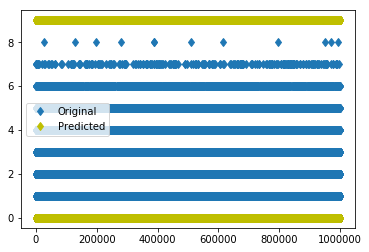

In [15]:
print("Accuracy :", round(accuracy * 100, 3))
plt.plot(test_y, 'd', label = "Original")
plt.plot(prediction, 'yd', label = "Predicted")
plt.legend()
plt.show()

In [16]:
preds = prediction
confMat = [[0] * config.classes for x in range(config.classes)]

for i in range(len(preds)):
    predLabel = preds[i]
    actLabel = test_y[i]
    confMat[actLabel][predLabel] += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
tab = PrettyTable(header)
l = 0
for c in confMat:
    tab.add_row(["Real " + str(l)] + c)
    l += 1

print(tab)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 | 491576 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |  9633  |
| Real 1 | 414414 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |  8084  |
| Real 2 | 46709  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |  913   |
| Real 3 | 20729  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |  392   |
| Real 4 |  3853  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   32   |
| Real 5 |  1962  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   34   |
| Real 6 |  1402  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |